<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-fitting" data-toc-modified-id="Model-fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model fitting</a></span></li><li><span><a href="#Prior-distribution" data-toc-modified-id="Prior-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prior distribution</a></span></li><li><span><a href="#Logistic-fits" data-toc-modified-id="Logistic-fits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic fits</a></span></li><li><span><a href="#Threshold---Gain-plot" data-toc-modified-id="Threshold---Gain-plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Threshold - Gain plot</a></span></li><li><span><a href="#Threshold---Asymmetry-plot" data-toc-modified-id="Threshold---Asymmetry-plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Threshold - Asymmetry plot</a></span></li><li><span><a href="#slope-vs-density" data-toc-modified-id="slope-vs-density-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>slope vs density</a></span></li><li><span><a href="#plot-half-ot-the-gain-and-r-star" data-toc-modified-id="plot-half-ot-the-gain-and-r-star-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>plot half ot the gain and r-star</a></span></li><li><span><a href="#thresholds-&amp;-density" data-toc-modified-id="thresholds-&amp;-density-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>thresholds &amp; density</a></span></li></ul></div>

# Model fitting

```
$ python fitting_models.py i
```
where `i` is the seed number.



# Prior distribution

In [2]:
# load alpha that is fitted
import pickle as pkl
import numpy as np# load the fitted ec parameter: r_max
savedir = './res_fit_alpha_fit_test/'

x_opt = []
LSE = 99999
model_name = ''
LSE_s = []
x_opt_s = []
model_name_s = []

for ii in range(1000):
    try:
        with open(savedir + 'res_fit_alpha_fit_test{0}.pkl'.format(ii), 'rb') as f:
            data_1 = pkl.load(f)

        for i in range(len(data_1['res_s'])):
            LSE_s.append(data_1['res_s'][i]['fun'])
            x_opt_s.append(data_1['res_s'][i]['x'])
            if LSE > data_1['res_s'][i]['fun']:
                LSE = data_1['res_s'][i]['fun']
                x_opt = data_1['res_s'][i]['x']
    except:
        ''

idxxx = np.argsort(LSE_s)
xss = np.array(x_opt_s)
id = np.argmin(LSE_s)

print(LSE_s[id]) # loss
print(xss[id]) # parameter fitted

7.123836782987522
[0.22222222 8.        ]


In [3]:
from fitting_models import value_efficient_coding_moment, fitting_model_model

N_neurons = 39
R_t = 245.41
ec_moment = value_efficient_coding_moment(
    './', N_neurons=N_neurons, R_t=R_t, X_OPT_ALPH=xss[id][0], slope_scale = 5.07)

/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:33: RuntimeWarning: divide by zero encountered in log
  self.x_log = np.log(self.x)  # np.linspace(-5, 5, num=int(1e3))
/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:35: RuntimeWarning: divide by zero encountered in log
  self.x_log_inf = np.log(self.x_inf)


In [4]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

def log_kde(x, y, sigma, x_sample):
    """ calculates a log-normal based kernel density estimate
    based on samples at x with weights/probabilities y evaluated at x_sample"""
    # mean = exp(mu + sigma^2/2) != mtrue
    # -> mu = log(mtrue) - sigma^2/2
    mu = np.log(x) - (sigma ** 2 / 2)
    y_sample = np.zeros_like(x_sample)
    for mu_i, y_i in zip(mu, y):
        y_sample += (np.exp(-((np.log(x_sample) - mu_i) ** 2) / 2 / (sigma ** 2))
                     / np.sqrt(2 * np.pi) / sigma / x_sample) * y_i
    return y_sample

data = sio.loadmat('./measured_neurons/curve_fit_parameters.mat')['ps'] 
# "curve_fit_parameters.mat" is the file that contains logistic fits of neurons
# read './measured_neurons/CurveFit.ipynb' for more info
midpoints = data[np.setdiff1d(np.linspace(0,39,40).astype(np.int16), 19),2]


%matplotlib notebook 
from matplotlib.path import Path
from matplotlib.patches import PathPatch
fig,ax = plt.subplots(1,1)
line2= ax.plot(ec_moment.x, ec_moment.d_x, color='k')

plt.plot(ec_moment.x[:8500], ec_moment.p_prior[:8500], color='#999999')

xs = np.log(ec_moment.x[:8500])
ys = log_kde(midpoints, np.ones(39)/39, .7, ec_moment.x[:8500])

plt.plot(ec_moment.x[:8500], ys,color='#9ebcda')
ax.vlines(midpoints, 0, .012*np.ones(midpoints.shape),colors='#9ebcda')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(0, 25)
ax.set_ylim(0, .22)
ax.set_xticks([0,10,20])
fig.set_figwidth(6.2)
fig.set_figheight(2)


plt.savefig('./figures/midpoints.png',bbox_inches = 'tight')
plt.savefig('./figures/midpoints.pdf',bbox_inches = 'tight')

<IPython.core.display.Javascript object>

/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_48877/962954358.py:31: RuntimeWarning: divide by zero encountered in log
  xs = np.log(ec_moment.x[:8500])
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_48877/962954358.py:13: RuntimeWarning: divide by zero encountered in log
  y_sample += (np.exp(-((np.log(x_sample) - mu_i) ** 2) / 2 / (sigma ** 2))
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_48877/962954358.py:13: RuntimeWarning: invalid value encountered in true_divide
  y_sample += (np.exp(-((np.log(x_sample) - mu_i) ** 2) / 2 / (sigma ** 2))


# Logistic fits

As mentioned, "curve_fit_parameters.mat"  contains result of logistic fits of neurons.

Read './measured_neurons/CurveFit.ipynb' for more info

In [5]:
# load sigmoid fit results
# read './measured_neurons/CurveFit.ipynb' for more info
import pickle as pkl
import scipy.io as sio

N_neurons = 39
R_t = 245.41
# `simpler=True`: simpler version of ec_moment
# only used to caclulate r_max_CI efficiently
ec = value_efficient_coding_moment(
    './', N_neurons=N_neurons, R_t=R_t, X_OPT_ALPH=xss[id][0], slope_scale = 5.07, simpler=True)

dir_measured_neurons = 'measured_neurons/'

NDAT = sio.loadmat(dir_measured_neurons + 'data_max.mat')['dat']
data = sio.loadmat(dir_measured_neurons + 'curve_fit_parameters.mat')

indices = np.setdiff1d(np.linspace(0, 39, 40).astype(np.int16), 19) # except one neuron
param_set = [data['ps_lcb'][indices], data['ps']
             [indices], data['ps_ucb'][indices]]

/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:33: RuntimeWarning: divide by zero encountered in log
  self.x_log = np.log(self.x)  # np.linspace(-5, 5, num=int(1e3))
/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:35: RuntimeWarning: divide by zero encountered in log
  self.x_log_inf = np.log(self.x_inf)


In [6]:
# verify r_max_hat = 245.51 and get r_max's confidence interval

# curve
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))

# calculate r_max_hat
neurons_all_ = []
for i in range(len(ec.neurons_)):
    neurons_all_.append(sigmoid_func(
        ec.x, *data['ps'][indices][i, :]))
r_max_hat = np.sum([np.sum(np.array(neurons_all_[i]) * ec.p_prior * ec._x_gap)
            for i in range(len(neurons_all_))])
print(r_max_hat) # 245.41

# calculate r_max's confidence interval
neurons_all = []
for j in range(data['ps_total'][indices].shape[1]):
    neurons_all_ = []
    for i in range(len(ec.neurons_)):
        neurons_all_.append(sigmoid_func(
            ec.x, *data['ps_total'][indices][i, j, :]))
    neurons_all.append(neurons_all_)
    
r_max_CI  = [np.sum(np.array(neurons_all[i]) * ec.p_prior * ec._x_gap)
            for i in range(len(neurons_all))]
print('min {}, max {}'.format(min(r_max_CI),max(r_max_CI)))


245.40911987446552
min 178.67799776800712, max 253.0370261317267


/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_48877/1488416813.py:5: RuntimeWarning: overflow encountered in exp
  return b / (1 + np.exp(-(x - c) * a))


In [7]:
# bootstrapping confidence interval

# curve
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))

ps_bootstrap = sio.loadmat('./measured_neurons/curve_fit_bootstrap.mat')['ps']
ps_bootstrap=ps_bootstrap[np.setdiff1d(np.linspace(0,39,40).astype(np.int16), 19),:,:]


# calculate r_max's confidence interval
neurons_all = []
for j in range(ps_bootstrap.shape[1]):
    neurons_all_ = []
    for i in range(len(ec.neurons_)):
        neurons_all_.append(sigmoid_func(
            ec.x, *ps_bootstrap[i, j, :]))
    neurons_all.append(np.sum(np.array(neurons_all_) * ec.p_prior * ec._x_gap))
    
# r_max_CI  = [np.sum(np.array(neurons_all[i]) * ec.p_prior * ec._x_gap)
#             for i in range(len(neurons_all))]
# print('min {}, max {}'.format(min(r_max_CI),max(r_max_CI)))



In [8]:
min (neurons_all)


238.1632129069556

In [9]:
print(np.percentile(neurons_all, 2.5))
print(np.percentile(neurons_all, 97.5))
r_max_CI = np.linspace(np.percentile(neurons_all, 5), np.percentile(neurons_all, 95), 100)

241.45831007503256
249.3044773107344


In [10]:
# bootstrapping confidence interval

# curve
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))

ps_bootstrap = sio.loadmat('./measured_neurons/curve_fit_bootstrap.mat')['ps']
ps_bootstrap=ps_bootstrap[np.setdiff1d(np.linspace(0,39,40).astype(np.int16), 19),:,:]


# calculate r_max's confidence interval
neurons_all = []
for j in range(ps_bootstrap.shape[1]):
    neurons_all_ = []
    for i in range(len(ec.neurons_)):
        neurons_all_.append(sigmoid_func(
            ec.x, *ps_bootstrap[i, j, :]))
    neurons_all.append(np.sum(np.array(neurons_all_) * ec.p_prior * ec._x_gap))
    
# r_max_CI  = [np.sum(np.array(neurons_all[i]) * ec.p_prior * ec._x_gap)
#             for i in range(len(neurons_all))]
# print('min {}, max {}'.format(min(r_max_CI),max(r_max_CI)))



# Threshold - Gain plot

In [11]:
print(np.percentile(neurons_all, 5))
print(np.percentile(neurons_all, 95))
r_max_CI = np.linspace(np.percentile(neurons_all, 5), np.percentile(neurons_all, 95), 100)

242.1080365879301
248.5636907083531


In [12]:
# load the fitted ec parameter: r_max
savedir = './res_fit_alpha_fit_test/'

x_opt = []
LSE = 99999
model_name = ''
LSE_s = []
x_opt_s = []
model_name_s = []

for ii in range(1000):
    try:
        with open(savedir + 'res_fit_alpha_fit_test{0}.pkl'.format(ii), 'rb') as f:
            data_1 = pkl.load(f)
        for i in range(len(data_1['res_s'])):
            LSE_s.append(data_1['res_s'][i]['fun'])
            x_opt_s.append(data_1['res_s'][i]['x'])
            if LSE > data_1['res_s'][i]['fun']:
                LSE = data_1['res_s'][i]['fun']
                x_opt = data_1['res_s'][i]['x']
    except:
        ''

idxxx = np.argsort(LSE_s)
xss = np.array(x_opt_s)
id = np.argmin(LSE_s)

print(LSE_s[id]) # loss
print(xss[id]) # parameter fitted

7.123836782987522
[0.22222222 8.        ]


In [13]:
# get rmax for every neurons... which is a constant value
g_x_rstar = []
for i in range(len(ec_moment.neurons_)):
    g_x_rstar.append(xss[id][1])

ec_moment = value_efficient_coding_moment(
    './', N_neurons=N_neurons, R_t=R_t, X_OPT_ALPH=xss[id][0], slope_scale = 5.07, simpler=True)
ec_moment.replace_with_pseudo() # use high-definition
# get asymmatric slopes 
# increase num_samples to int(1e4) 
tf, quantiles_constant, thresholds_constant, alphas, xs, ys = ec_moment.plot_approximate_kinky_fromsim_fitting_only_raw_rstar(
    ec_moment.neurons_, '.', r_star_param=g_x_rstar, num_samples=int(1e4))

/Users/dongjaekim/opt/anaconda3/envs/efficient-coding-dist-rl/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [14]:
# load details from Dabneys paper. refer to `./measured_neurons/dabney_matlab/`
import scipy.io as sio
fig5 = sio.loadmat("./measured_neurons/dabney_matlab/dabney_fit.mat")
fig5_betas = sio.loadmat("./measured_neurons/dabney_matlab/dabney_utility_fit.mat")
zero_crossings = fig5['zeroCrossings_all'][:, 0]
scaleFactNeg_all = fig5['scaleFactNeg_all'][:, 0]
scaleFactPos_all = fig5['scaleFactPos_all'][:, 0]
asymM_all = fig5['asymM_all'][:, 0]
ZC_true_label = fig5['utilityAxis'].squeeze()
ZC_estimator = lambda x: fig5_betas["betas"][0, 0] + fig5_betas["betas"][1, 0] * x
idx_to_maintain = np.where((scaleFactNeg_all * scaleFactPos_all) > 0)[0]
asymM_all = asymM_all[idx_to_maintain]
asymM_all_save = asymM_all.copy()
idx_sorted = np.argsort(asymM_all)
asymM_all = asymM_all[idx_sorted]
estimated_ = np.array(ec_moment.get_quantiles_RPs(asymM_all))
zero_crossings_ = fig5['zeroCrossings_all'][:, 0]
zero_crossings_ = zero_crossings_[idx_to_maintain]
zero_crossings_ = zero_crossings_[idx_sorted]
zero_crossings_estimated = ZC_estimator(zero_crossings_) # estimated thresholds

In [19]:

dir_measured_neurons='measured_neurons/'
NDAT = sio.loadmat(dir_measured_neurons + 'data_max.mat')['dat']
zero_crossings_estimated = NDAT['ZC'][0, 0].squeeze()

/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:33: RuntimeWarning: divide by zero encountered in log
  self.x_log = np.log(self.x)  # np.linspace(-5, 5, num=int(1e3))
/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:35: RuntimeWarning: divide by zero encountered in log
  self.x_log_inf = np.log(self.x_inf)
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_48877/943334919.py:56: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax4.scatter(zero_crossings_estimated, param_set[1][:, 1][idx_sorted_], s=10, c=[0, 0, 0])


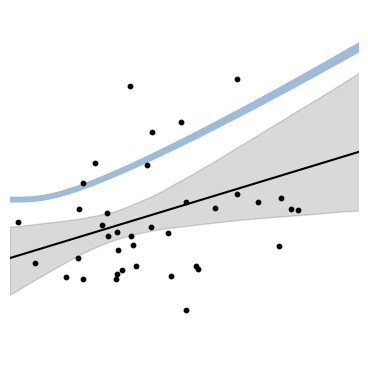

In [20]:
# non linear fit + bootstrap
%matplotlib inline
fig4, ax4 = plt.subplots(1, 1)
idx_sorted_ = np.argsort(asymM_all_save)
# ax4.scatter(zero_crossings_estimated,  param_set[1][:, 1][idx_sorted_], s=10, color=[0,0,0])
import scipy
from scipy.optimize import curve_fit

hires_x = np.linspace(0, 15, 1000)
func = lambda x, a, b: a*(x) + b
# best_fit_ab, covar = curve_fit(func, NDAT['ZC'][0,0].squeeze(), param_set[1][:,1],
#                                absolute_sigma = True)
best_fit_ab, covar = curve_fit(func, zero_crossings_estimated, param_set[1][:,1][idx_sorted_],
                               absolute_sigma = True)


num_sim = int(5e3)
ps = []
for i in range(num_sim):
    i_sample = np.random.choice(np.linspace(0,len(zero_crossings_estimated)-1,len(zero_crossings_estimated),dtype=np.int16),len(zero_crossings_estimated))
    while True:
        try:
            fit_ab, covar = curve_fit(func, zero_crossings_estimated[i_sample], param_set[1][:,1][idx_sorted_][i_sample],
                                       absolute_sigma = True, p0=[1,1], maxfev=int(1e4))
        except:
            print('redo it with different random seed.')
        break
        
    ps.append(fit_ab)
    

scipy.stats.pearsonr(zero_crossings_estimated, param_set[1][:,1][idx_sorted_])


alpha_lin = np.linspace(.2, 1, len(r_max_CI))
rp1data = []
rp2data = []

y_RRs = []
for count, R in enumerate(np.sort(r_max_CI)):
    ec = value_efficient_coding_moment(
        './', N_neurons=N_neurons, R_t=R, X_OPT_ALPH=xss[id][0], slope_scale=5.07)
    ec.replace_with_pseudo()
    y_RRs.append(ec.g_x_pseudo)

    
y_RRs = np.asarray(y_RRs)
lower = np.percentile(y_RRs, 5, axis=0)
upper = np.percentile(y_RRs, 95, axis=0)
ax4.fill_between(ec.x_inf, lower, upper,
                 color = '#9ebcda', alpha = 1)    
# ax4.plot(ec.x_inf, ec.g_x_pseudo, '-', linewidth=1,
#              c='#9ebcda',alpha=1)

ax4.set_xticks([.1, .3, 1.2, 2.5, 5, 10, 20])
ax4.scatter(zero_crossings_estimated, param_set[1][:, 1][idx_sorted_], s=10, c=[0, 0, 0])
ysample = np.asarray([func(hires_x, *pi) for pi in ps])
lower = np.percentile(ysample, 5, axis=0)
upper = np.percentile(ysample, 95, axis=0)

ax4.plot(hires_x, func(hires_x, *best_fit_ab), 'black')
ax4.fill_between(hires_x, lower, upper,
                 color = 'black', alpha = 0.15)


ax4.set_xlim(0, 12)
ax4.set_ylim(0, 40)
fig4.set_figwidth(4.5)
fig4.set_figheight(4.5)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)


ax4.set_xlim(0, 12)
ax4.set_ylim(0, 40)
fig4.savefig(
    './figures/threshold-gain2-boot.png')
fig4.savefig(
    './figures/threshold-gain2-boot.pdf')
# for illustration
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.set_xticks([])
ax4.set_yticks([])
fig4.savefig(
    './figures/threshold-gain2-boot3.pdf')
fig4.savefig(
    './figures/threshold-gain2-boot3.png')


In [16]:
print(np.percentile(neurons_all, 2.5))
print(np.percentile(neurons_all, 97.5))
r_max_CI = np.linspace(np.percentile(neurons_all, 2.5), np.percentile(neurons_all, 97.5), 100)

241.45831007503256
249.3044773107344


# Threshold - Asymmetry plot

In [17]:
# get rmax for every neurons... which is a constant value
print(xss[id])
g_x_rstar = []
for i in range(len(ec_moment.neurons_)):
    g_x_rstar.append(xss[id][1])

ec_moment = value_efficient_coding_moment(
    './', N_neurons=N_neurons, R_t=R_t, X_OPT_ALPH=xss[id][0], slope_scale=5.07, simpler=True)
ec_moment.replace_with_pseudo()  # use high-definition
# get asymmatric slopes
# increase num_samples to int(1e4)
tf, quantiles_constant, thresholds_constant, alphas, xs, ys = ec_moment.plot_approximate_kinky_fromsim_fitting_only_raw_rstar(
    ec_moment.neurons_, '.', r_star_param=g_x_rstar, num_samples=int(1e4))

[0.22222222 8.        ]


/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:33: RuntimeWarning: divide by zero encountered in log
  self.x_log = np.log(self.x)  # np.linspace(-5, 5, num=int(1e3))
/Users/dongjaekim/Library/CloudStorage/GoogleDrive-dongjae.k.kim@gmail.com/내 드라이브/연구/efficient-coding-dist-rl/fitting_models.py:35: RuntimeWarning: divide by zero encountered in log
  self.x_log_inf = np.log(self.x_inf)
/Users/dongjaekim/opt/anaconda3/envs/efficient-coding-dist-rl/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


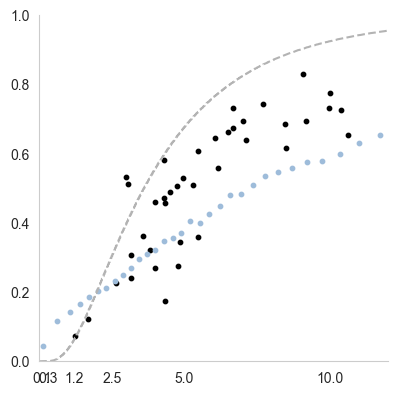

In [18]:

fig, ax = plt.subplots(1,1)
RPs = ec_moment.get_quantiles_RPs(quantiles_constant)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(zero_crossings_estimated, asymM_all, s=10, color='k')
ax.scatter(thresholds_constant, quantiles_constant, s=10, color='#9ebcda')
ax.set_xticks([.1, .3, 1.2, 2.5, 5, 10, 20])
ax.set_xlim([0, 12])
ax.set_ylim([0, 1])
plt.grid(False)
fig.set_figwidth(4.5)
fig.set_figheight(4.5)

RPSS = ec_moment.get_quantiles_RPs(np.linspace(0,1,1000))
# ax.plot(np.linspace(0,1,1000), RPSS, '--', color=[.7,.7,.7])
ax.plot(RPSS,np.linspace(0,1,1000), '--', color=[.7,.7,.7])

fig4.savefig(
    './figures/threshold-asymm.png')
plt.savefig(
    './figures/threshold-asymm.pdf')

# slope vs density

In [18]:
dir_measured_neurons = 'measured_neurons/'

data = sio.loadmat(dir_measured_neurons + 'curve_fit_parameters.mat')


In [19]:
# verify r_max_hat = 245.51 and get r_max's confidence interval

# curve
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))

indices = np.setdiff1d(np.linspace(0, 39, 40).astype(np.int16), 19) # except one neuron
param_set = [data['ps_lcb'][indices], data['ps']
             [indices], data['ps_ucb'][indices]]

# calculate r_max_hat
neurons_all_ = []
for i in range(len(ec_moment.neurons_)):
    neurons_all_.append(sigmoid_func(
        ec_moment.x, *data['ps'][indices][i, :]))
r_max_hat = np.sum([np.sum(np.array(neurons_all_[i]) * ec_moment.p_prior * ec_moment._x_gap)
            for i in range(len(neurons_all_))])
print(r_max_hat) # 245.41

# calculate r_max's confidence interval
neurons_all = []
for j in range(data['ps_total'][indices].shape[1]):
    neurons_all_ = []
    for i in range(len(ec_moment.neurons_)):
        neurons_all_.append(sigmoid_func(
            ec_moment.x, *data['ps_total'][indices][i, j, :]))
    neurons_all.append(neurons_all_)

r_max_CI  = [np.sum(np.array(neurons_all[i]) * ec_moment.p_prior * ec_moment._x_gap)
            for i in range(len(neurons_all))]
print('min {}, max {}'.format(min(r_max_CI),max(r_max_CI)))

245.9573228552075


/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_27879/4146988434.py:5: RuntimeWarning: overflow encountered in exp
  return b / (1 + np.exp(-(x - c) * a))


min 179.4294320276579, max 253.51161173836374


In [20]:
# get first derivative of the sigmoid function
def first_derivative_sigmoid_func(x, a, b, c):
    return a*b*np.exp(-a*(x-c))/ (1 + np.exp(-a*(x-c)))**2

print(xss[id]) # parameter fitted

[0.88888889 7.        ]


In [21]:
_slopes = []
_thresholds = []
for i in range(len(neurons_all_)):
    idx = np.argmin(np.abs(neurons_all_[i] - xss[id][1]))
    _thresholds.append(ec_moment.x[idx])
    _slopes.append(first_derivative_sigmoid_func(ec_moment.x[idx],*data['ps'][indices][i, :]))
print(_thresholds)
print(_slopes)

[8.310831083108312, 6.570657065706571, 6.240624062406241, 6.690669066906691, 4.71047104710471, 4.29042904290429, 0.39003900390039004, 4.26042604260426, 6.480648064806481, 5.9405940594059405, 6.0606060606060606, 5.1005100510051005, 5.2505250525052505, 9.3009300930093, 7.680768076807681, 5.7305730573057305, 5.5805580558055805, 6.600660066006601, 58.325832583258325, 1.8301830183018302, 13.111311131113112, 5.8805880588058805, 7.800780078007801, 47.284728472847284, 6.420642064206421, 12.061206120612061, 10.831083108310832, 9.000900090009, 12.241224122412241, 11.911191119111912, 13.261326132613261, 8.13081308130813, 3.0303030303030303, 7.410741074107411, 8.1008100810081, 7.800780078007801, 4.35043504350435, 39.78397839783978, 9.390939093909392]
[1.1719259842845764, 1.510842531969211, 1.1482457451901447, 1.593473817363226, 1.677621387709231, 1.355093800424365, 1.011801849827517, 1.5898359411178138, 0.992146957387797, 1.6102301909617172, 1.0486284283547804, 1.0847742069618815, 0.94929683254237

In [22]:
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))
# fitting to sigmoid_func
from scipy.optimize import curve_fit
num_samples = int(100)
# get ec_moment.x samples from ec_moment.p_prior
idx_samples = np.random.choice(np.linspace(0,len(ec_moment.p_prior)-1, len(ec_moment.p_prior)), size=(num_samples), p=ec_moment.p_prior*ec_moment._x_gap).astype(np.int16)
x_samples = ec_moment.x[idx_samples]

np.random.seed(1000)

neurons_sigfit = []
neuorns_ps = []
for i in range(len(ec_moment.neurons_)):
    # one poisson sample from firing rate
    neuron_samples = [np.random.poisson(ec_moment.neurons_[i][sample]) for sample in idx_samples]
    popt, pcov = curve_fit(sigmoid_func,x_samples, neuron_samples, p0=[1, 1, 1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
    neurons_sigfit.append(sigmoid_func(ec_moment.x, *popt))
    neuorns_ps.append(popt)

In [23]:
_thresholds_constant = []
_slopes_constant = []
for i in range(len(neurons_all_)):
    _thresholds_constant.append(thresholds_constant[i])
    idx = np.argmin(np.abs(ec_moment.x - thresholds_constant[i]))
    _slopes_constant.append(first_derivative_sigmoid_func(ec_moment.x[idx],*neuorns_ps[i]))

In [24]:

import matplotlib as mpl
mpl.style.use('default')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11


PearsonRResult(statistic=-0.6290617233653668, pvalue=1.792579072318402e-05)
PearsonRResult(statistic=-0.38387594391496305, pvalue=0.015841455351941997)


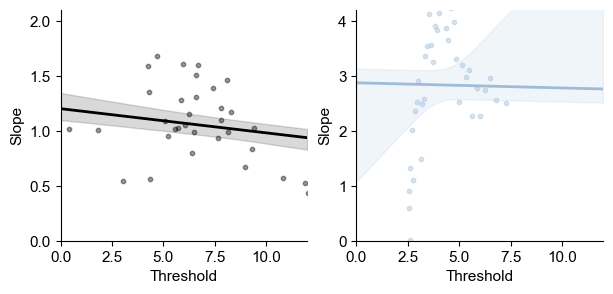

In [25]:
%matplotlib inline
# scatter plot between _thresholds and _slopes
fig, ax = plt.subplots(1,2)
# plot fitted line for the scatter plot
from scipy import stats

# plot figure without grids

# hires_x = np.linspace(0, 15, 1000)
# func = lambda x, a, b: a*(x) + b
# ysample = np.asarray([func(hires_x, *pi) for pi in ps])
# lower = np.percentile(ysample, 5, axis=0)
# upper = np.percentile(ysample, 95, axis=0)
# ax4.fill_between(hires_x, lower, upper,
#                  color = 'black', alpha = 0.15)

func = lambda x, slope, intercept: slope*(x) + intercept
num_sim = int(5e3)
ps = []
for i in range(num_sim):
    i_sample = np.random.choice(np.linspace(0,len(zero_crossings_estimated)-1,len(zero_crossings_estimated),dtype=np.int16),len(zero_crossings_estimated))
    while True:
        try:
            # fit the line for _thresholds and _slopes
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(_thresholds)[i_sample], np.array(_slopes)[i_sample])
        except:
            print('redo it with different random seed.')
        break

    ps.append([slope, intercept])

slope, intercept, r_value, p_value, std_err = stats.linregress(_thresholds, _slopes)
ax[0].plot([0, 12], [intercept, intercept + slope * 12], 'k', lw=2)
# bow tie shaped shaded plot for the 90% confidence interval
ysample = np.asarray([func(np.linspace(0,12,100), *pi) for pi in ps])
lower = np.percentile(ysample, 5, axis=0)
upper = np.percentile(ysample, 95, axis=0)
ax[0].fill_between(np.linspace(0,12,100), lower, upper,
                 color = 'black', alpha = 0.15)



func = lambda x, slope, intercept: slope*(x) + intercept
ps = []
for i in range(num_sim):
    i_sample = np.random.choice(np.linspace(0,len(zero_crossings_estimated)-1,len(zero_crossings_estimated),dtype=np.int16),len(zero_crossings_estimated))
    while True:
        try:
            # fit the line for _thresholds and _slopes
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(_thresholds_constant)[i_sample], np.array(_slopes_constant)[i_sample])
        except:
            print('redo it with different random seed.')
        break

    ps.append([slope, intercept])
slope, intercept, r_value, p_value, std_err = stats.linregress(_thresholds_constant, _slopes_constant)
ax[1].plot([0, 12], [intercept, intercept + slope * 12], '#9ebcda', lw=2)
ysample = np.asarray([func(np.linspace(0,12,100), *pi) for pi in ps])
lower = np.percentile(ysample, 5, axis=0)
upper = np.percentile(ysample, 95, axis=0)
ax[1].fill_between(np.linspace(0,12,100), lower, upper,
                 color = '#9ebcda', alpha = 0.15)



ax[0].scatter(_thresholds, _slopes, s=10, color='k', alpha=0.4)
ax[1].scatter(_thresholds_constant, _slopes_constant, s=10, color='#9ebcda', alpha=0.4)


# plt.grid(True)
fig.set_figwidth(7)
fig.set_figheight(3)

# ax.legend(['Measured neurons','Efficient code'])

# correlation analysis for r and p
from scipy.stats import pearsonr
print(pearsonr(_thresholds, _slopes))
print(pearsonr(_thresholds_constant, _slopes_constant))

for i in range(2):
    ax[i].set_xlabel('Threshold')
    ax[i].set_ylabel('Slope')

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

    ax[i].set_xlim([0, 12])
    if i == 0:
        ax[i].set_ylim([0, 2.1])
        ax[i].set_yticks(np.linspace(0, 2, 5))
    else:
        ax[i].set_ylim([0, 4.2])
        ax[i].set_yticks(np.linspace(0, 4, 5))



fig.savefig(
    './figures/threshold-slope_model_sbs_diffaxis.png')
fig.savefig(
    './figures/threshold-slope_model_sbs_diffaxis.pdf')
plt.show()

# plot half ot the gain and r-star


In [25]:
NDAT = sio.loadmat(dir_measured_neurons + 'data_max.mat')['dat']
data = sio.loadmat(dir_measured_neurons + 'curve_fit_parameters.mat')

In [26]:
data = data['ps']
half_gain_model = [ec_moment.gsn[i] / 2 for i in range(len(ec_moment.gsn))]


In [27]:
# curve
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))

# collect b from sigmoid _func
bs = []
for i in range(len(data)):
    bs.append(data[i][1])

# half of the gain
half_gain = np.array(bs) / 2

# remove the neuron that is not valid
half_gain = np.delete(half_gain, 19)

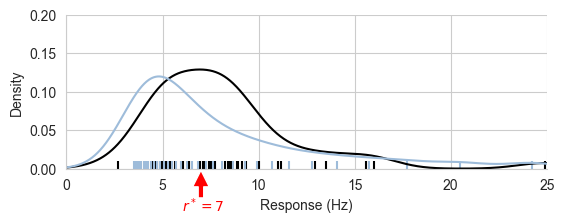

In [28]:
%matplotlib inline
# plot small ticks of half gain
fig, ax = plt.subplots(1, 1)

# vlines plot of half gain
ax.vlines(half_gain, 0, .01*np.ones(39), colors='k')
ax.vlines(half_gain_model, 0, .01*np.ones(39), colors='#9ebcda')

from scipy.stats import norm
def normal_kde(x, y, sigma, x_sample):
    """calculates a normal based kernel density estimate
    based on samples at x with weights/probabilities y evaluated at x_sample"""
    y_sample = np.zeros_like(x_sample)
    for x_i, y_i in zip(x, y):
        y_sample += (norm.pdf((x_sample - x_i) / sigma) / sigma) * y_i
    return y_sample

# plot gaussian_kde of half gain
ys = normal_kde(half_gain, np.ones(39)/39, 1.4, ec_moment.x[:8500])
plt.plot(ec_moment.x[:8500], ys, color='k')

# plot gaussian_kde of half_gain_model
ys = normal_kde(half_gain_model, np.ones(39)/39, 1.4, ec_moment.x[:8500])
plt.plot(ec_moment.x[:8500], ys, color='#9ebcda')


# plot red vertical long line on 7.666667
# ax.vlines(7.666667, 0, .2, colors='r')
# and text that sais its $r^*$
# ax.text(7.6, .16, '$r^*$', color='r')

# small red arrow on the x axis that shows r^*
ax.annotate(
    '', xy=(7.0, 0), xytext=(7.0, -.04),
    arrowprops=dict(facecolor='red', shrink=0.05))

# text right below the arrow says its $r^*$
ax.text(6, -.055, '$r^*=7$', color='r')

# xticks and yticks and labels
ax.set_xticks(np.linspace(0, 25, 6))
ax.set_yticks(np.linspace(0, .2, 5))
ax.set_xlabel('Response (Hz)')
ax.set_ylabel('Density')

# set x and y lim
ax.set_xlim(0, 25)
ax.set_ylim(0, .2)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.set_figwidth(6.2)
fig.set_figheight(2)
# write title that says it is half gain of the neurons
# plt.title('Half gain of the neurons')
plt.savefig('./figures/half_gain.png', bbox_inches='tight')
# pdf
plt.savefig('./figures/half_gain.pdf', bbox_inches='tight')

plt.show()


# thresholds & density


In [29]:
dir_measured_neurons = 'measured_neurons/'

data = sio.loadmat(dir_measured_neurons + 'curve_fit_parameters.mat')


In [30]:
# verify r_max_hat = 245.51 and get r_max's confidence interval

# curve
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))

indices = np.setdiff1d(np.linspace(0, 39, 40).astype(np.int16), 19) # except one neuron
param_set = [data['ps_lcb'][indices], data['ps']
             [indices], data['ps_ucb'][indices]]

# calculate r_max_hat
neurons_all_ = []
for i in range(len(ec_moment.neurons_)):
    neurons_all_.append(sigmoid_func(
        ec_moment.x, *data['ps'][indices][i, :]))
r_max_hat = np.sum([np.sum(np.array(neurons_all_[i]) * ec_moment.p_prior * ec_moment._x_gap)
            for i in range(len(neurons_all_))])
print(r_max_hat) # 245.41

# calculate r_max's confidence interval
neurons_all = []
for j in range(data['ps_total'][indices].shape[1]):
    neurons_all_ = []
    for i in range(len(ec_moment.neurons_)):
        neurons_all_.append(sigmoid_func(
            ec_moment.x, *data['ps_total'][indices][i, j, :]))
    neurons_all.append(neurons_all_)

r_max_CI  = [np.sum(np.array(neurons_all[i]) * ec_moment.p_prior * ec_moment._x_gap)
            for i in range(len(neurons_all))]
print('min {}, max {}'.format(min(r_max_CI),max(r_max_CI)))

245.9573228552075


/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/4146988434.py:5: RuntimeWarning: overflow encountered in exp
  return b / (1 + np.exp(-(x - c) * a))


min 179.4294320276579, max 253.51161173836374


In [31]:
# get first derivative of the sigmoid function
def first_derivative_sigmoid_func(x, a, b, c):
    return a*b*np.exp(-a*(x-c))/ (1 + np.exp(-a*(x-c)))**2

print(xss[id]) # parameter fitted

[0.88888889 7.        ]


In [32]:
_slopes = []
_thresholds = []
for i in range(len(neurons_all_)):
    idx = np.argmin(np.abs(neurons_all_[i] - xss[id][1]))
    _thresholds.append(ec_moment.x[idx])
    _slopes.append(first_derivative_sigmoid_func(ec_moment.x[idx],*data['ps'][indices][i, :]))
print(_thresholds)
print(_slopes)

[8.310831083108312, 6.570657065706571, 6.240624062406241, 6.690669066906691, 4.71047104710471, 4.29042904290429, 0.39003900390039004, 4.26042604260426, 6.480648064806481, 5.9405940594059405, 6.0606060606060606, 5.1005100510051005, 5.2505250525052505, 9.3009300930093, 7.680768076807681, 5.7305730573057305, 5.5805580558055805, 6.600660066006601, 58.325832583258325, 1.8301830183018302, 13.111311131113112, 5.8805880588058805, 7.800780078007801, 47.284728472847284, 6.420642064206421, 12.061206120612061, 10.831083108310832, 9.000900090009, 12.241224122412241, 11.911191119111912, 13.261326132613261, 8.13081308130813, 3.0303030303030303, 7.410741074107411, 8.1008100810081, 7.800780078007801, 4.35043504350435, 39.78397839783978, 9.390939093909392]
[1.1719259842845764, 1.510842531969211, 1.1482457451901447, 1.593473817363226, 1.677621387709231, 1.355093800424365, 1.011801849827517, 1.5898359411178138, 0.992146957387797, 1.6102301909617172, 1.0486284283547804, 1.0847742069618815, 0.94929683254237

In [33]:
def sigmoid_func(x, a, b, c):
    return b / (1 + np.exp(-(x - c) * a))
# fitting to sigmoid_func
from scipy.optimize import curve_fit
num_samples = int(100)
# get ec_moment.x samples from ec_moment.p_prior
idx_samples = np.random.choice(np.linspace(0,len(ec_moment.p_prior)-1, len(ec_moment.p_prior)), size=(num_samples), p=ec_moment.p_prior*ec_moment._x_gap).astype(np.int16)
x_samples = ec_moment.x[idx_samples]

np.random.seed(1000)

neurons_sigfit = []
neuorns_ps = []
for i in range(len(ec_moment.neurons_)):
    # one poisson sample from firing rate
    neuron_samples = [np.random.poisson(ec_moment.neurons_[i][sample]) for sample in idx_samples]
    popt, pcov = curve_fit(sigmoid_func,x_samples, neuron_samples, p0=[1, 1, 1], bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
    neurons_sigfit.append(sigmoid_func(ec_moment.x, *popt))
    neuorns_ps.append(popt)

In [34]:
_thresholds_constant = []
_slopes_constant = []
for i in range(len(neurons_all_)):
    _thresholds_constant.append(thresholds_constant[i])
    idx = np.argmin(np.abs(ec_moment.x - thresholds_constant[i]))
    _slopes_constant.append(first_derivative_sigmoid_func(ec_moment.x[idx],*neuorns_ps[i]))

In [35]:
data = sio.loadmat('./measured_neurons/curve_fit_parameters.mat')['ps']
# "curve_fit_parameters.mat" is the file that contains logistic fits of neurons
# read './measured_neurons/CurveFit.ipynb' for more info
midpoints = data[np.setdiff1d(np.linspace(0, 39, 40).astype(np.int16), 19), 2]

In [36]:
midpoints_models = []

#find for each in ec_moment.neurons_ the index of the neuron that has the half of ec_moment.gsn
for i in range(len(ec_moment.neurons_)):
    # argmin
    idx = np.argmin(np.abs(ec_moment.neurons_[i] - ec_moment.gsn[i] / 2))
    # append ec_moment.x
    midpoints_models.append(ec_moment.x[idx])
midpoints_models = np.array(midpoints_models)

In [45]:
import matplotlib as mpl
mpl.style.use('default')

/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/3634329032.py:12: RuntimeWarning: divide by zero encountered in log
  xs = np.log(ec_moment.x[:8500])
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/962954358.py:13: RuntimeWarning: divide by zero encountered in log
  y_sample += (np.exp(-((np.log(x_sample) - mu_i) ** 2) / 2 / (sigma ** 2))
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/962954358.py:13: RuntimeWarning: invalid value encountered in true_divide
  y_sample += (np.exp(-((np.log(x_sample) - mu_i) ** 2) / 2 / (sigma ** 2))
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/3634329032.py:15: RuntimeWarning: divide by zero encountered in log
  xs = np.log(ec_moment.x[:8500])
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/3634329032.py:28: RuntimeWarning: divide by zero encountered in log
  xs = np.log(ec_moment.x[:8500])
/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/ipykernel_26529/3634329032.

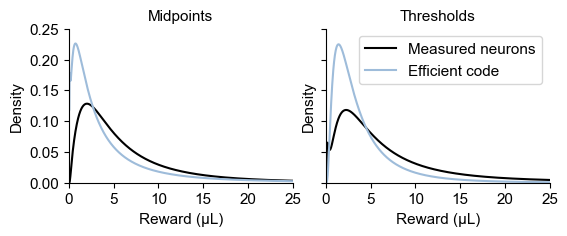

In [51]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('default')
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11

fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'wspace': 0.15})
ax[0].grid(False)
ax[1].grid(False)

sigma = .8


xs = np.log(ec_moment.x[:8500])
ys = log_kde(midpoints, np.ones(39)/39, sigma, ec_moment.x[:8500])
ax[0].plot(ec_moment.x[:8500], ys, color='k')
xs = np.log(ec_moment.x[:8500])
ys = log_kde(midpoints_models, np.ones(39)/39, sigma, ec_moment.x[:8500])
ax[0].plot(ec_moment.x[:8500], ys, color='#9ebcda')
ax[0].set_xlim(0, 25)
ax[0].set_ylim(0, .25)
# set x ticks and y ticks
ax[0].set_xticks([0, 5, 10, 15, 20, 25])
ax[0].set_yticks([0, .05, .1, .15, .2, .25])

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)


xs = np.log(ec_moment.x[:8500])
ys = log_kde(_thresholds, np.ones(39)/39,sigma, ec_moment.x[:8500])
ax[1].plot(ec_moment.x[:8500], ys, color='k')
xs = np.log(ec_moment.x[:8500])
ys = log_kde(_thresholds_constant, np.ones(39)/39,sigma, ec_moment.x[:8500])
ax[1].plot(ec_moment.x[:8500], ys, color='#9ebcda')
ax[1].set_xlim(0, 25)
ax[1].set_ylim(0, .25)
ax[1].set_xticks([0, 5, 10, 15, 20, 25])
ax[1].set_yticks([0, .05, .1, .15, .2, .25])

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
# plt.plot(ec_moment.x[:8500], ys,color='#9ebcda')
# ax.vlines(midpoints, 0, .012*np.ones(midpoints.shape),colors='#9ebcda')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# proper size
fig.set_figwidth(6.2)
fig.set_figheight(2)
# set x and y labels
ax[0].set_xlabel('Reward (µL)')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Reward (µL)')
ax[1].set_ylabel('Density')

# set titles
ax[0].set_title('Midpoints', fontsize=11)
ax[1].set_title('Thresholds', fontsize=11)

# figure legend
ax[1].legend(['Measured neurons', 'Efficient code'], loc='upper right', frameon=True)


plt.savefig('./figures/midpoints_thresholds.png', bbox_inches='tight')
plt.savefig('./figures/midpoints_thresholds.pdf', bbox_inches='tight')
plt.show()
